In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv(r'E:\Machine_Learning\ML_Lesson\11-ML_Pipelines\titanic.csv',usecols=['Survived','Age','Fare'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [8]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
x_train['age_imputed'] = x_train['Age']
x_test['age_imputed'] = x_test['Age']

In [11]:
x_train

,Age,Fare,age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [12]:
x_train['age_imputed'][x_train['age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: age_imputed, Length: 148, dtype: float64

In [16]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([ 2.  , 27.  ,  0.42, 27.  , 21.  , 38.  , 54.  , 70.5 , 32.5 ,
       34.  , 36.  , 34.  ,  9.  ,  4.  , 29.  , 23.  , 23.  , 38.  ,
       42.  ,  5.  , 18.  , 27.  ,  0.67, 34.  , 31.  , 60.  ,  8.  ,
       22.  , 41.  , 16.  , 22.  , 13.  , 30.  , 32.  ,  9.  , 26.  ,
       36.  , 21.  , 28.  , 22.  , 39.  ,  0.83, 31.  , 58.  , 45.  ,
       57.  , 50.  , 20.  , 31.  , 19.  , 29.  , 47.  , 51.  , 26.  ,
       32.  , 18.  , 28.5 , 25.  , 36.  , 29.  , 16.  , 20.  , 47.  ,
       40.  , 21.  , 39.  , 22.  , 32.  , 18.  , 25.  , 50.  , 29.  ,
       25.  , 34.  , 30.  , 24.  , 18.  , 31.  , 45.  , 13.  , 32.  ,
       52.  , 59.  , 28.  , 14.  , 35.  , 31.  , 44.  , 18.  , 29.  ,
       23.  , 51.  , 46.  , 24.  , 52.  , 25.  , 27.  , 33.  , 24.  ,
       28.  , 29.  , 25.  , 54.  , 30.  ,  3.  , 39.  , 29.  , 14.  ,
       30.  , 30.  , 31.  , 34.  , 45.  , 45.  , 29.  , 31.  , 16.  ,
       16.  , 58.  , 30.  , 35.  , 21.  , 24.  , 30.  , 21.  , 29.  ,
       36.  , 20.  ,

In [15]:
x_train['age_imputed'][x_train['age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['age_imputed'][x_test['age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [20]:
x_train['age_imputed'].isnull().sum()

0

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_3920\413131289.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Orignal',hist=False)
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_3920\413131289.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['

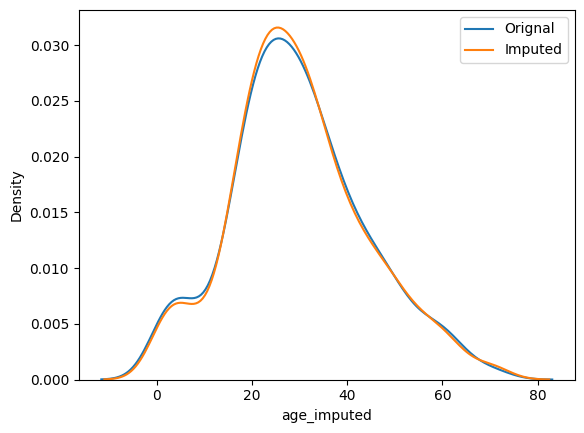

In [21]:
sns.distplot(x_train['Age'],label='Orignal',hist=False)
sns.distplot(x_train['age_imputed'],label='Imputed',hist=False)

plt.legend()
plt.show()

In [25]:
# NO DIFRENCE IN VARIANCE
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['age_imputed'].var())      

Original variable variance:  204.3495133904614
Variance after random imputation:  201.3372237385233


In [28]:
 x_train[['Fare','Age','age_imputed']].cov()        ### covariance changes

,Fare,Age,age_imputed
Fare,2368.246832,71.512440,47.646784
Age,71.512440,204.349513,204.349513
age_imputed,47.646784,204.349513,201.337224


<AxesSubplot: >

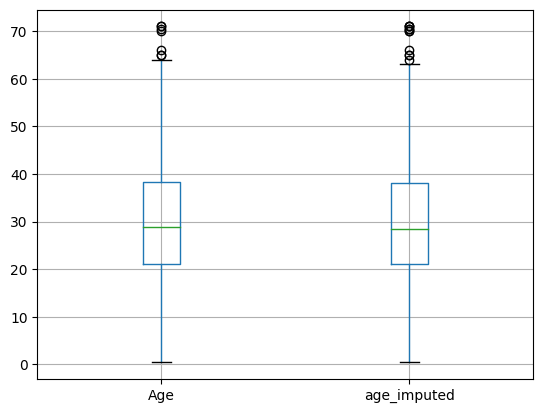

In [31]:
x_train[['Age', 'age_imputed']].boxplot()

## Categorical data

In [32]:
data = pd.read_csv(r'E:\Machine_Learning\ML_Lesson\12-Handeling_missing_data\Handeling_missing_categorial_data\housing.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [33]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [34]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [35]:
x= data
y = data['SalePrice']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [37]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [38]:
x_train.sample(4)

,Age,Fare,age_imputed
262,52.0,79.6500,52.0
488,30.0,8.0500,30.0
703,25.0,7.7417,25.0
87,NaN,8.0500,16.0


In [39]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_3920\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_3920\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_3920\856878696.py:4: SettingWithCopyWarning: 
A

In [40]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [41]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_3920\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_3920\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

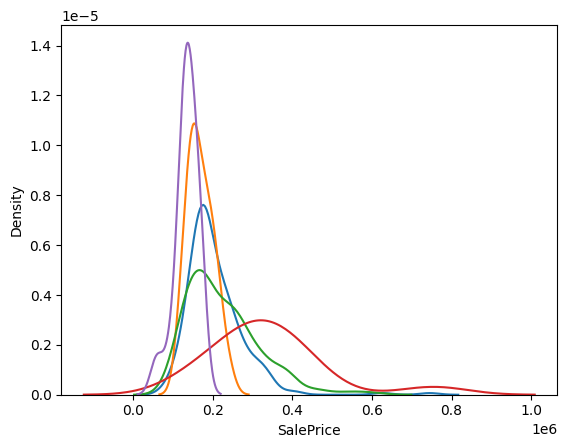

In [42]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_3920\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_3920\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

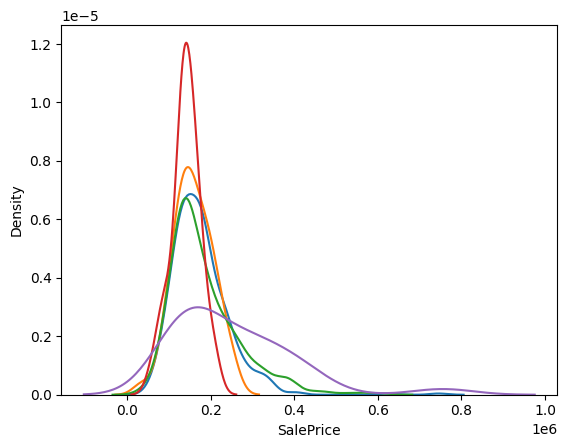

In [43]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()